# Machine Learning with sklearn


By Aditi Chaudhari

## Reading the Auto Data

First, the data from Auto.csv is read into a dataframe. 

In [39]:
import pandas as pd

# use pandas to read the data
url = 'https://raw.githubusercontent.com/aditi-chaudhari/machine_learning_portfolio/main/ml_with_sklearn/Auto.csv'
df = pd.read_csv(url)

# outputting the first few rows of the data frame
print("Auto data: ")
print(df.head())

# outputting the dimensions of the data
print()
print("Dimensions of data frame: ", df.shape)


Auto data: 
    mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0         130    3504          12.0  70.0   
1  15.0          8         350.0         165    3693          11.5  70.0   
2  18.0          8         318.0         150    3436          11.0  70.0   
3  16.0          8         304.0         150    3433          12.0  70.0   
4  17.0          8         302.0         140    3449           NaN  70.0   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  

Dimensions of data frame:  (392, 9)


## Data Exploration with Code

Next, we want to explore the data. We specifically want to find out more for the mpg, weight, and year columns. For mpg, the range lies between 9 and 46 and the average is 23.445928. For weight, the range lies between 1613 and 5140 and the average is 2977.584184. For year, the range lies between 70 and 82 and the average is 76.010256. 

In [40]:
# using describe() on the mpg, weight, and year columns
print("Describe() for mpg, weight, and year: ")
df2 = df[['mpg','weight','year']]
print(df2.describe())

# for mpg, the range lies between 9 and 46. the average is 23.445928.
# for weight, the range lies between 1613 and 5140. the average is 2977.584184.
# for year, the range lies between 70 and 82. the average is 76.010256. 


Describe() for mpg, weight, and year: 
              mpg       weight        year
count  392.000000   392.000000  390.000000
mean    23.445918  2977.584184   76.010256
std      7.805007   849.402560    3.668093
min      9.000000  1613.000000   70.000000
25%     17.000000  2225.250000   73.000000
50%     22.750000  2803.500000   76.000000
75%     29.000000  3614.750000   79.000000
max     46.600000  5140.000000   82.000000


## Explore Data Types

After that, we want to explore the data types of each column. Certain columns need to be made categorical, as well. 

In [41]:
# check the data types of all columns
print("The data type of each column is: ")
print(df.dtypes)

# change the cylinders column to categorical
df.cylinders = df.cylinders.astype('category').cat.codes

# change the origin column to categorical 
df.origin = df.origin.astype('category')

# verify the changes with the dtypes attribute
print()
print("After changing the cylinder column and the origin column to categorical, the data type of each column is: ")
print(df.dtypes)


The data type of each column is: 
mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year            float64
origin            int64
name             object
dtype: object

After changing the cylinder column and the origin column to categorical, the data type of each column is: 
mpg              float64
cylinders           int8
displacement     float64
horsepower         int64
weight             int64
acceleration     float64
year             float64
origin          category
name              object
dtype: object


## Deal with NAs

To further clean up our data, we need to get rid of the rows with N/As.

In [42]:
# delete rows with NAs & output the new dimensions
df = df.dropna()

print("After deleting rows with N/As, the new dimensions of the data frame are: ", df.shape)



After deleting rows with N/As, the new dimensions of the data frame are:  (389, 9)


## Modifying Columns

Next, we need to create a new column for cars with a higher than average mpg. We also need to drop the previous mpg column since we don't want our machine learning model to learn from it and we need to drop the name column since it is not numerical. 


In [43]:
# make a new column, mpg_high, and make it categorical: the column == 1 if mpg > average mpg, else == 0
avg_mpg = df['mpg'].mean()
df['mpg_high'] = pd.cut(df['mpg'], bins=[0, avg_mpg, float('Inf')] , labels=[0,1])

# delete the mpg and name columns
df.drop('mpg', inplace=True, axis=1)
df.drop('name', inplace=True, axis=1)

# output the first few rows of the modified data frame
print("After creating a new column and deleting two columns, the first few rows of the data frame look like: ")
print(df.head())


After creating a new column and deleting two columns, the first few rows of the data frame look like: 
   cylinders  displacement  horsepower  weight  acceleration  year origin  \
0          4         307.0         130    3504          12.0  70.0      1   
1          4         350.0         165    3693          11.5  70.0      1   
2          4         318.0         150    3436          11.0  70.0      1   
3          4         304.0         150    3433          12.0  70.0      1   
6          4         454.0         220    4354           9.0  70.0      1   

  mpg_high  
0        0  
1        0  
2        0  
3        0  
6        0  


## Data exploration with Graphs

Next, we want compare how many cars have a high mpg to how many cars don't. We use a seaborn catplot to find this out. One thing we can learn from the catplot is that the amount of 1s (mpg > avg_mpg) is similar to the amount of 0s (mpg <= avg_mpg)

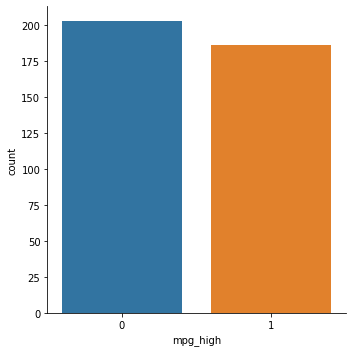

In [44]:
import seaborn as sb

# seaborn catplot on the mpg_high column
sb.catplot(x='mpg_high', kind='count', data=df)

We also want to see how a high mpg compares to the weight of a car and the horsepower of a car. We can achieve this using a seaborn relplot. One thing we can learn from the relplot is that the mpg is lower than the average in a car with a higher weight and larger horsepower

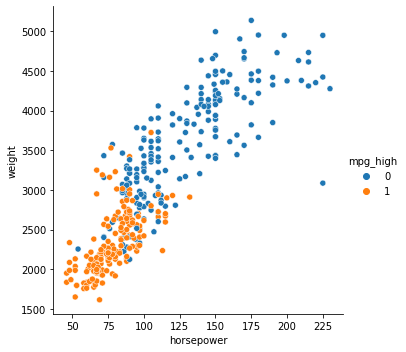

In [45]:
# seaborn relplot with horsepower on the x axis, weight on the y axis, setting hue or style to mpg_high
sb.relplot(x='horsepower', y= 'weight', data=df, hue=df.mpg_high)

Finally, we want to see how a high mpg compares to the weight of a car. This can be done with a seaborn boxplot. One thing we can learn from the boxplot is that 50% of the data in the 1 catergory (mpg <= avg_mpg) occur at lower weights (between 2000 and 2500 pounds)

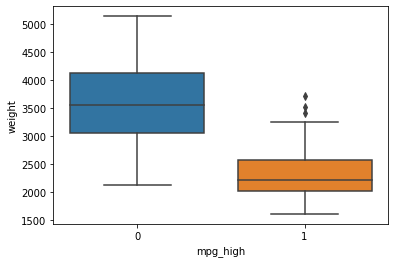

In [46]:
# seaborn boxplot with mpg_high on the x axis and weight on the y axis
sb.boxplot(x='mpg_high', y='weight',data=df)


## Train/Test Split

Next, let us split our data into a train set and a test set to perform machine learning algorithms on them. We chose a 80/20 split and made sure to remove the mpg_high column from our training data since it is what we are predicting and we don't want our algorithm to learn from it. 

In [47]:
from sklearn.model_selection import train_test_split


X = df.loc[:, ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']]
y = df.mpg_high

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

print('train size:', X_train.shape)
print('test size:', X_test.shape)


train size: (311, 7)
test size: (78, 7)


## Logistic Regression

The first machine learning algorithm we use for our data was logistic regression. We wanted to use our predictors to classify if a car has a higher than average mpg or not. Our model had a pretty good accuracy of 86%. 

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# train a logistic regression model using solver lbfgs
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

# test and evaluate
lr_pred = lr.predict(X_test)

print(classification_report(y_test, lr_pred))


              precision    recall  f1-score   support

           0       0.98      0.80      0.88        50
           1       0.73      0.96      0.83        28

    accuracy                           0.86        78
   macro avg       0.85      0.88      0.85        78
weighted avg       0.89      0.86      0.86        78



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


## Decision Tree

Next, we built a decision tree to classify cars with higher than average mpgs. Our decision tree algorithm did not converge, but it gave us an accuracy of 92%. 

In [62]:
from sklearn.tree import DecisionTreeClassifier

# train a decision tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# test and evaluate
dt_pred = dt.predict(X_test)

print(classification_report(y_test, dt_pred))





              precision    recall  f1-score   support

           0       0.96      0.92      0.94        50
           1       0.87      0.93      0.90        28

    accuracy                           0.92        78
   macro avg       0.91      0.92      0.92        78
weighted avg       0.93      0.92      0.92        78



We also attempted to visualize our decision tree, but since our tree had so many nodes, it is difficult to decipher. 

[Text(0.6433823529411765, 0.9444444444444444, 'X[0] <= 2.5\ngini = 0.5\nsamples = 311\nvalue = [153, 158]'),
 Text(0.4338235294117647, 0.8333333333333334, 'X[2] <= 101.0\ngini = 0.239\nsamples = 173\nvalue = [24, 149]'),
 Text(0.27941176470588236, 0.7222222222222222, 'X[5] <= 75.5\ngini = 0.179\nsamples = 161\nvalue = [16, 145]'),
 Text(0.14705882352941177, 0.6111111111111112, 'X[1] <= 119.5\ngini = 0.362\nsamples = 59\nvalue = [14, 45]'),
 Text(0.058823529411764705, 0.5, 'X[4] <= 13.75\ngini = 0.159\nsamples = 46\nvalue = [4, 42]'),
 Text(0.029411764705882353, 0.3888888888888889, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.08823529411764706, 0.3888888888888889, 'X[3] <= 2683.0\ngini = 0.087\nsamples = 44\nvalue = [2, 42]'),
 Text(0.058823529411764705, 0.2777777777777778, 'X[3] <= 2377.0\ngini = 0.045\nsamples = 43\nvalue = [1, 42]'),
 Text(0.029411764705882353, 0.16666666666666666, 'gini = 0.0\nsamples = 38\nvalue = [0, 38]'),
 Text(0.08823529411764706, 0.16666666666666666, 'X

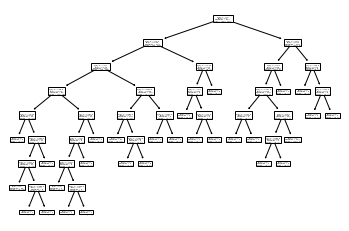

In [63]:
from sklearn import tree
tree.plot_tree(dt)

## Neural Network

Finally, we wanted to predict whether a car had a higher than average mpg or not using neural networks. Two neural networks with different network topologies were built in order to find a more accurate model. 

First, a neural network was built with two hidden layers. The first layer had 3 nodes and the second had 2 nodes. Our first model got an accuracy of 87%.

In [64]:
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing

# scale data
scaler = preprocessing.StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# train a neural network, choosing a network topology of your choice
nn = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(3, 2), max_iter=500, random_state=1234)
nn.fit(X_train_scaled, y_train)


# test and evaluate
nn_pred = nn.predict(X_test_scaled)

print(classification_report(y_test, nn_pred))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90        50
           1       0.80      0.86      0.83        28

    accuracy                           0.87        78
   macro avg       0.86      0.87      0.86        78
weighted avg       0.87      0.87      0.87        78



Next, another neural network was built with a simpler architecture of only 5 nodes. Our second model got an accuracy of 86%. 

In [65]:
nn = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(5,), max_iter=500, random_state=1234)
nn.fit(X_train_scaled, y_train)


# test and evaluate
nn_pred = nn.predict(X_test_scaled)

print(classification_report(y_test, nn_pred))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88        50
           1       0.76      0.89      0.82        28

    accuracy                           0.86        78
   macro avg       0.85      0.87      0.85        78
weighted avg       0.87      0.86      0.86        78



### Comparison of our Neural Network Models

Our first neural network model performed better simply because it had a more complex network topology. Based on Karen Mazidi's "Machine Learning Handbook", there are a few rules in order to find the number of hidden nodes. Firstly, the number of nodes can be between 1 and the number of predictors. Secondly, the number of nodes can be 2/3s of the input layer size plus the size of the output layer. Thirdly, the number of nodes can be below twice the input layer size. 

I used the second rule for the first neural network model, and got an accuracy of 87%. For the second neural network model, I just guessed one layer with five nodes, and got a worse accuracy. Because I guessed at the number of nodes for the second neural network model, I assume this is why it performed worse than the first. 



## Analysis

After running a logistic regression algorithm, a decision tree algorithm, and two neural network algorithms to classify which cars have a higher than average mpg, it was determined that the decision tree performed the best. 

The decision tree had an accuracy of 92%, whereas logistic regression had an accuracy of 86% and the better performing neural network had an accuracy of 87%. The decision tree also had comparable or better recall than the other two models. Out of all of the cars that actually did have a higher than average mpg, the model only predicted this outcome correctly for 93% of the cars. In comparison, the logistic regression model had a recall of 96% and the better performing neural network had a recall of 86%. Out of all the cars that didn't have a higher than average mpg, the model predicted the outcome correctly for 92% of the cars. In comparison, the logistic regression model had a recall of 80% and the better performing neural network had one of 88%. The decision tree was also more precise than the other models. Out of the all the cars the model predicted would have a higher mpg than average, 87% actually did. The logistic regression model only had 73% precision, and the better performing neural network had 80% precision. Out of all the cars that the model predicted wouldn't have a higher than average mpg, 96% of them actually did. The logistic regression model had 98% precision and the better performing neural network only had 92% precision. Therefore, the decision tree performed the best. 

Although decision trees and logistic regression tend to have a similar performance for classification, the decison tree outperformed the logistic regression model because the relationship between the predictors and the target variable in this case was more complex and not linear. The decision tree also outperformed the neural network because neural networks generally do not outperform simpler models for small data. If the data set was larger and the function to learn was complex, then the neural network could have outperfomed the decision tree. 

After learning the foundations of machine learning with R, coding in Python with sklearn was a new experience. I enjoyed working with sklearn more than I did R. Python is my programming language of choice, so it was really exciting to finally be able to explore the data science libraries that Python has. Another reason I preferred Python over R is because Python was faster in training and testing models. I remember when I built a decision tree model in R, it took a while for the model to be built. But with Python, it was so quick. I definitely enjoyed using Python more. 